# <center> <h1> Naive Bayes Gaussiano </h1> </center>

In [1]:
# Import library
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
datos = pd.read_csv("heart.csv")
datos.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


## Duplicate values

In [3]:
datos[datos.duplicated()]
# drop duplicate values 
datos.drop_duplicates(keep='first',inplace=True)

## Scaling data

In [4]:
# copy the data 
df_copy = datos.copy()

from sklearn.preprocessing import MinMaxScaler
#Create objectscaler 
scaler = MinMaxScaler()
# Fit data
df_scaled = scaler.fit_transform(df_copy)
#convert array to data frame
df_scaled  = pd.DataFrame(df_scaled)
# Reset labels to data frame
df_scaled.columns = datos.columns
df_scaled.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0


# Configuracion de variables test y train

In [5]:
# define the variable 'x' and 'y'

X = df_scaled.drop('output', axis=1)
y = df_copy['output']

In [6]:
# Spliting data train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create models

## load model and metrics

In [7]:
# import classification model
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [8]:
model = GaussianNB(var_smoothing=1e-09)  # var_smoothing se utiliza para suavizar las estimaciones de la varianza de las características en el modelo
model.fit(X_train, y_train)

GaussianNB()

In [9]:
# make model predictions about the test
prediccion_model = model.predict(X_test)

# score accuracy predictions, the correct value is sent on the estimated
print(f'Accuracy train = {model.score(X_train, y_train)}')
print(f'Accuracy test = {metrics.accuracy_score(y_test, prediccion_model)}')
print(f'cv score = {cross_val_score(model, X, y, cv= 10).mean()}')

Accuracy train = 0.8381742738589212
Accuracy test = 0.819672131147541
cv score = 0.8079569892473119


# Confusion Matrix

<Figure size 1100x1100 with 0 Axes>

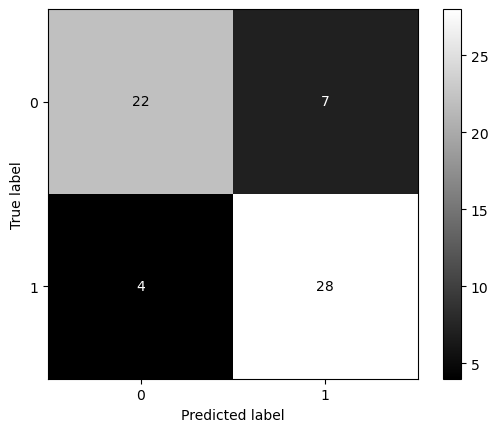

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediccion_model,  labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot(cmap='gray')
plt.show()

# Make any predicct 

In [11]:
# save model
#import pickle

#pickle.dump(Cat_Boosting, open("Cat_Boosting.pkl", "wb"))